In [4]:
%run ../../shared_setup.ipynb

The Cython magic has been move to the Cython package, hence 
`%load_ext cythonmagic` is deprecated; Please use `%load_ext Cython` instead.

Though, because I am nice, I'll still try to load it for you this time.


## Explore assembly files

In [5]:
assembly_dir = '/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006'

In [6]:
!ls -lh {assembly_dir}

total 103M
drwxrwsr-x 3 aliman malariagen   3 Apr  7 18:14 mummer
-rw-rw-r-- 1 aliman malariagen 14M Apr  7 11:45 plasmodium_falciparum__isolate_7g8__1_contigs.fasta
-rw-rw-r-- 1 aliman malariagen 15M Apr  7 11:45 plasmodium_falciparum__isolate_7g8__1_supercontigs.fasta
-rw-rw-r-- 1 aliman malariagen 20M Apr  7 11:45 plasmodium_falciparum__isolate_dd2__1_contigs.fasta
-rw-rw-r-- 1 aliman malariagen 21M Apr  7 11:45 plasmodium_falciparum__isolate_dd2__1_supercontigs.fasta
-rw-rw-r-- 1 aliman malariagen 24M Apr  7 11:45 plasmodium_falciparum__isolate_hb3__1_contigs.fasta
-rw-rw-r-- 1 aliman malariagen 23M Apr  7 18:01 plasmodium_falciparum__isolate_hb3__1_contigs.fasta.flat
-rw-rw-r-- 1 aliman malariagen 79K Apr  7 18:01 plasmodium_falciparum__isolate_hb3__1_contigs.fasta.gdx
-rw-rw-r-- 1 aliman malariagen 24M Apr  7 11:45 plasmodium_falciparum__isolate_hb3__1_supercontigs.fasta
-rw-rw-r-- 1 aliman malariagen 24M Apr  7 18:02 plasmodium_falciparum__isolate_hb3__1_supercontigs.fasta.flat


In [29]:
fasta_hb3_contigs = os.path.join(assembly_dir, 'plasmodium_falciparum__isolate_hb3__1_contigs.fasta')
fasta_hb3_supercontigs = os.path.join(assembly_dir, 'plasmodium_falciparum__isolate_hb3__1_supercontigs.fasta')
fasta_dd2_contigs = os.path.join(assembly_dir, 'plasmodium_falciparum__isolate_dd2__1_contigs.fasta')
fasta_dd2_supercontigs = os.path.join(assembly_dir, 'plasmodium_falciparum__isolate_dd2__1_supercontigs.fasta')
fasta_7g8_contigs = os.path.join(assembly_dir, 'plasmodium_falciparum__isolate_7g8__1_contigs.fasta')
fasta_7g8_supercontigs = os.path.join(assembly_dir, 'plasmodium_falciparum__isolate_7g8__1_supercontigs.fasta')

In [8]:
!head {fasta_hb3_contigs}

>AANS01000001 | CONTIG_1 | part of supercont1.1 of Plasmodium falciparum (isolate hb3) | [1-1318] | 1318 nt 
TTCTGATACCACATTAAACATATATATATATATATATATACTATATATTGTGTATGTATT
TCAATTTGAAAATTATGGTGATAATTTATATAGGACTTCTATATAATCATCGTAGGATCA
TTTACAATTAAATATGTGCAGTATATATTTATTTAACATAATATATAATATATTTATTTG
AAAGGTAGAGAAAACTCATCATATAAGTACTATTAAATGTAGTACATAATTATTGAAATA
AAAATTCAATGTATTCTTGTTTTTTTTTTTTTTATCTTGTTTCAATATTGTTCTTTTCGA
ACTATTTTTGCATAATAAAAGAAAAAATAATAACATAAAAATTTTGGAAGTGTTATGAAA
TTAAAAAAAGAAAAAATATTCCTACGTCTTAATACCTTTCTTTAAAATGCATATAGGAAT
ACAATAATATTATAATATAATTCAAAAAGAATTTATTCATTTCCTTTTTTCTTTTTTTTA
TTTTTTCTCTATTCTTTTTAAAAGATACCTATTTATAAGCATATAATATGCATAATTATA


In [9]:
!head {fasta_hb3_supercontigs}

>Supercontig_1.1 of Plasmodium falciparum (isolate HB3)
TTCTGATACCACATTAAACATATATATATATATATATATACTATATATTGTGTATGTATT
TCAATTTGAAAATTATGGTGATAATTTATATAGGACTTCTATATAATCATCGTAGGATCA
TTTACAATTAAATATGTGCAGTATATATTTATTTAACATAATATATAATATATTTATTTG
AAAGGTAGAGAAAACTCATCATATAAGTACTATTAAATGTAGTACATAATTATTGAAATA
AAAATTCAATGTATTCTTGTTTTTTTTTTTTTTATCTTGTTTCAATATTGTTCTTTTCGA
ACTATTTTTGCATAATAAAAGAAAAAATAATAACATAAAAATTTTGGAAGTGTTATGAAA
TTAAAAAAAGAAAAAATATTCCTACGTCTTAATACCTTTCTTTAAAATGCATATAGGAAT
ACAATAATATTATAATATAATTCAAAAAGAATTTATTCATTTCCTTTTTTCTTTTTTTTA
TTTTTTCTCTATTCTTTTTAAAAGATACCTATTTATAAGCATATAATATGCATAATTATA


In [30]:
!head {fasta_dd2_contigs}

>AASM01000001 | CONTIG_1 | part of supercont1.1 of Plasmodium falciparum (isolate DD2) | [1-25173] | 25173 nt 
ACTTTTCAACTTTTTAATAGATTTTTCGGGCGTGTACTTTTATTTTATTTTCTTTTATTT
TATTTTCTTTTAGTTTCTTTTATTTATTTTATTTTATTTTATATTCGATTTTATTTATTA
TTATTTTTCCGTTTTAGGTGTATAGAGTCGTAAGTACATGTGTTTTTGTTATATTTATAG
TTTTGATAAACATTGTCGTATTGAATATATATATATATATATATTTATTTATATAGGTAT
ATATAATATTTTTTTAATATGATAATTCAAATAGATAGAGAAAAATTAGATTTATTTATT
TTTCCTTGATTATTTTTATCCATTTATGTTTTCGTATTTAAGTTCATTTTTTTTTTTTTT
TTTTTTTTTTTTTTATTTTATTTTATTTAATTAGAAGAGAATATATTACGAATGAGAATT
ATATGGAAAAATGAGTTCATTAATAAATTCGCTACTATTTAATGGTTTTATAAAAAAGAA
AGAAAATAAAAATGAAGAAAAACAAAATAAAAAAGATATACAAAATAATGAGAGTAATAG


In [31]:
!head {fasta_dd2_supercontigs}

>Supercontig_1.1 of Plasmodium falciparum (isolate Dd2)
ACTTTTCAACTTTTTAATAGATTTTTCGGGCGTGTACTTTTATTTTATTTTCTTTTATTT
TATTTTCTTTTAGTTTCTTTTATTTATTTTATTTTATTTTATATTCGATTTTATTTATTA
TTATTTTTCCGTTTTAGGTGTATAGAGTCGTAAGTACATGTGTTTTTGTTATATTTATAG
TTTTGATAAACATTGTCGTATTGAATATATATATATATATATATTTATTTATATAGGTAT
ATATAATATTTTTTTAATATGATAATTCAAATAGATAGAGAAAAATTAGATTTATTTATT
TTTCCTTGATTATTTTTATCCATTTATGTTTTCGTATTTAAGTTCATTTTTTTTTTTTTT
TTTTTTTTTTTTTTATTTTATTTTATTTAATTAGAAGAGAATATATTACGAATGAGAATT
ATATGGAAAAATGAGTTCATTAATAAATTCGCTACTATTTAATGGTTTTATAAAAAAGAA
AGAAAATAAAAATGAAGAAAAACAAAATAAAAAAGATATACAAAATAATGAGAGTAATAG


In [32]:
!head {fasta_7g8_contigs}

>ABGZ01000001 | CONTIG_1 | part of supercont1.1 of Plasmodium falciparum 7G8 (7G8) | [1-3261] | 3261 nt 
AATTATTATAGAAAGATAGCAGTTATTGTTATATGAATGGTTATATTTTCATTATAATAA
TGTATATAACACCAAAGTAAAAAAACAAAAATTTATATTTACCCAACAAAAAAAAGACAT
ATCAAAACATAACAAGTTATATCTTCAGTATGATCAAAATAAAAGAAATTCTGAAATAAA
ACATACAAATCACAAAGAAGATTATTCGATGTGCGACAATGTGATAACAAGCAAAATGAG
CCACATATCTAATATGGATAATCAATATGGTAATAATATTACATGTGATATACCCTTTTT
TGTTGAGAAAAAAACGAACAAGAAGAAGAAGACGAAGAAAAAAAAAAAAAAAAAAAAAAA
AAAAAATATTTTTAAAAAAAAGAAAGAATTCATCACAAGTTTATATGAATTAAATGATTT
TGTTATTATTATATATACTATAATTTCTCATATTCCTTATTTTTTATTTTTTAAAAATAA
AATTAAAGACCCATGTAAATGTCAAAAAGATTATTTATATAACATAGACATACTATTATT


In [33]:
!head {fasta_7g8_supercontigs}

>Supercontig_1.1 of Plasmodium falciparum (isolate 7G8)
AATTATTATAGAAAGATAGCAGTTATTGTTATATGAATGGTTATATTTTCATTATAATAA
TGTATATAACACCAAAGTAAAAAAACAAAAATTTATATTTACCCAACAAAAAAAAGACAT
ATCAAAACATAACAAGTTATATCTTCAGTATGATCAAAATAAAAGAAATTCTGAAATAAA
ACATACAAATCACAAAGAAGATTATTCGATGTGCGACAATGTGATAACAAGCAAAATGAG
CCACATATCTAATATGGATAATCAATATGGTAATAATATTACATGTGATATACCCTTTTT
TGTTGAGAAAAAAACGAACAAGAAGAAGAAGACGAAGAAAAAAAAAAAAAAAAAAAAAAA
AAAAAATATTTTTAAAAAAAAGAAAGAATTCATCACAAGTTTATATGAATTAAATGATTT
TGTTATTATTATATATACTATAATTTCTCATATTCCTTATTTTTTATTTTTTAAAAATAA
AATTAAAGACCCATGTAAATGTCAAAAAGATTATTTATATAACATAGACATACTATTATT


In [10]:
def genome_diagnostics(genome):
    n_contigs = len(genome.keys())
    log('n_contigs', n_contigs)
    contig_lens = [len(genome[contig]) for contig in genome.keys()]
    n_bases = sum(contig_lens)
    log('n_bases', n_bases)
    fig, ax = plt.subplots(figsize=(6, 3))
    sns.despine(ax=ax, offset=10)
    ax.hist(contig_lens, bins=30)
    ax.set_xlabel('contig length')
    ax.set_ylabel('frequency')

2015-04-08 11:17:13.787779 :: n_contigs 2971
2015-04-08 11:17:13.799925 :: n_bases 23431386


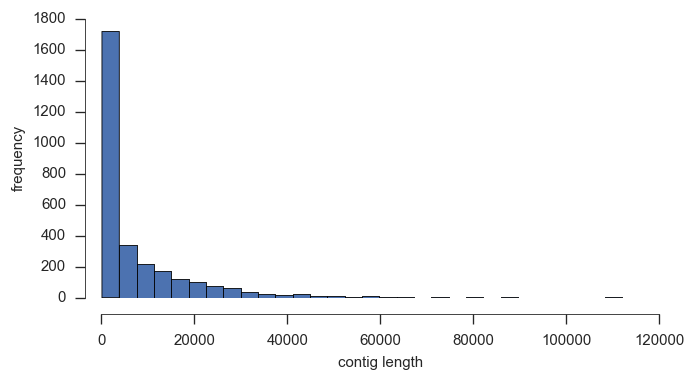

In [11]:
genome_hb3_contigs = pyfasta.Fasta(fasta_hb3_contigs, key_fn=lambda v: v.split()[0])
genome_diagnostics(genome_hb3_contigs)

2015-04-08 11:17:16.295576 :: n_contigs 1189
2015-04-08 11:17:16.302459 :: n_bases 24258511


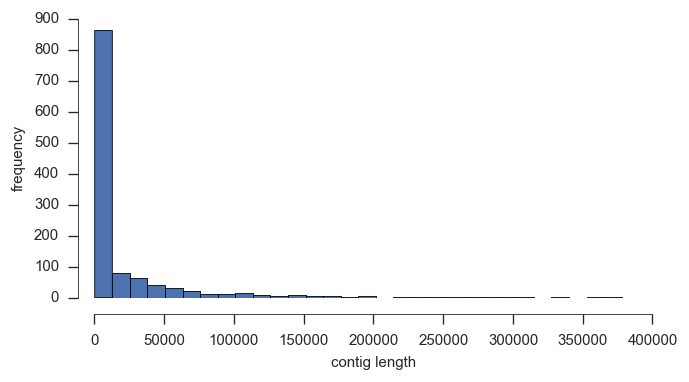

In [12]:
genome_hb3_supercontigs = pyfasta.Fasta(fasta_hb3_supercontigs, key_fn=lambda v: v.split()[0])
genome_diagnostics(genome_hb3_supercontigs)

2015-04-08 11:30:28.608609 :: n_contigs 4511
2015-04-08 11:30:28.730953 :: n_bases 19450413


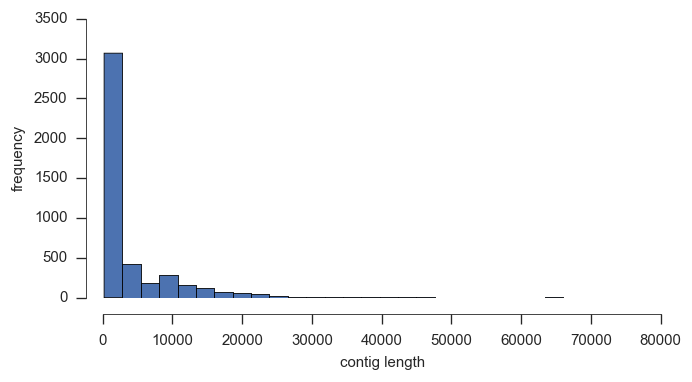

In [34]:
genome_dd2_contigs = pyfasta.Fasta(fasta_dd2_contigs, key_fn=lambda v: v.split()[0])
genome_diagnostics(genome_dd2_contigs)

2015-04-08 11:30:44.160416 :: n_contigs 2837
2015-04-08 11:30:44.176136 :: n_bases 20875591


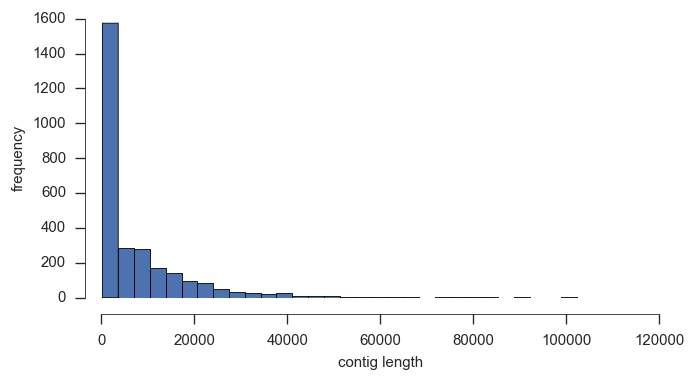

In [35]:
genome_dd2_supercontigs = pyfasta.Fasta(fasta_dd2_supercontigs, key_fn=lambda v: v.split()[0])
genome_diagnostics(genome_dd2_supercontigs)

2015-04-08 11:31:22.820886 :: n_contigs 8845
2015-04-08 11:31:22.858164 :: n_bases 13377912


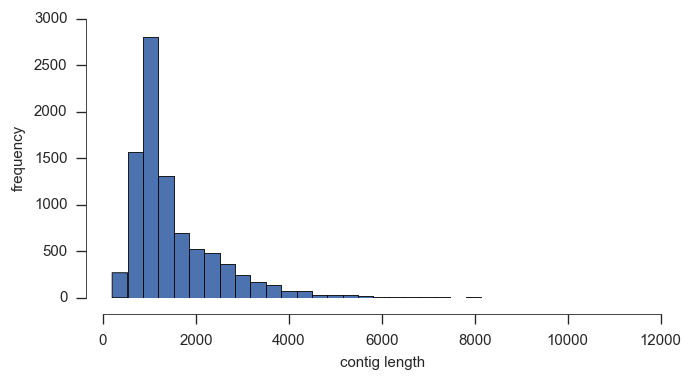

In [36]:
genome_7g8_contigs = pyfasta.Fasta(fasta_7g8_contigs, key_fn=lambda v: v.split()[0])
genome_diagnostics(genome_7g8_contigs)

2015-04-08 11:31:55.735756 :: n_contigs 4843
2015-04-08 11:31:55.753206 :: n_bases 14278891


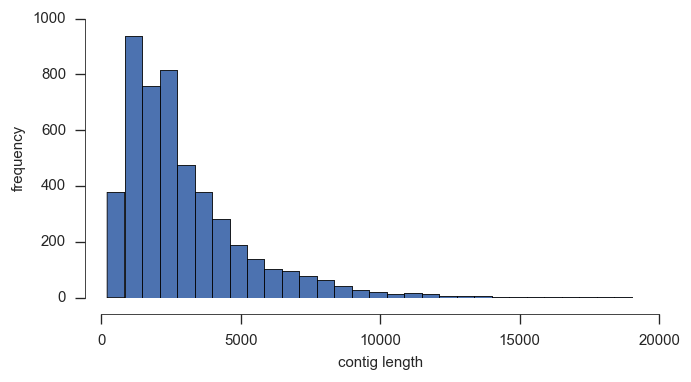

In [37]:
genome_7g8_supercontigs = pyfasta.Fasta(fasta_7g8_supercontigs, key_fn=lambda v: v.split()[0])
genome_diagnostics(genome_7g8_supercontigs)

## Investigate alignments with 3D7 version 3 via mummer

In [14]:
fasta_3d7_v3 = '/data/plasmodium/pfalciparum/pf-crosses/data/genome/sanger/version3/September_2012/Pf3D7_v3.lookseq.fa'
!head {fasta_3d7_v3}

>Pf3D7_01_v3
TGAACCCTAAAACCTAAACCCTAAACCCTAAACCCTGAACCCTAAACCCTGAACCCTAAA
CCCTAAACCCTGAACCCTAAACCCTAAACCCTGAACCCTAAACCCTGAAACCTAAACCCT
GAACCCTAAACCCTGAACCCTGAACCCTAACCCTAAACCCTAAACCTAAAACCCTGAACC
CTAAACCCTGAACCCTGAACCCTAAACCCTGAACCCTAAACCCTAAACCCTGAACCCTAA
ACCCTGAACCCTAAACCCTAAACCCTGAACCCTGAACCCTAAAACCTAAACCCTAAACCC
TAAACCCTAAACCCTGAACCTAAACCTAAAACCTAAAACCTAAAACCCTGAACCCTTACT
TTTCATTTCTTCTTCTTATCTTCTTACTTTTCATTCTTTACTCTTACTTACTTAGTCTTA
CTTACTTACTCTTACTTACTTACTCTTATCTTCTTACTTTTCATTTCTTAGTCTTACTTA
CTTACTCTTACTTACTTACTCTTATCTTCTTACTTTTCATTCCTTACTCTTACTTACTTA


2015-04-08 11:17:50.858610 :: n_contigs 14
2015-04-08 11:17:50.859478 :: n_bases 23292622


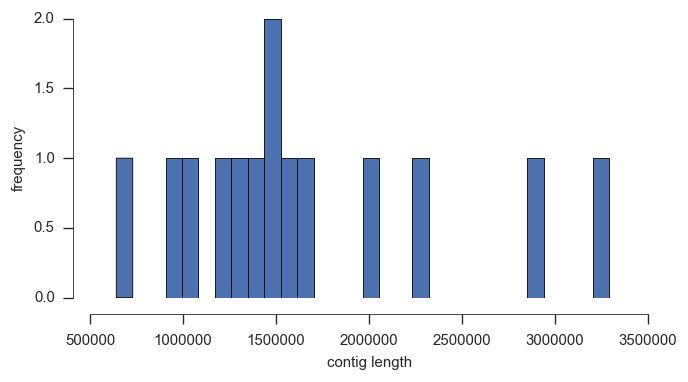

In [15]:
genome_3d7_v3 = pyfasta.Fasta(fasta_3d7_v3)
genome_diagnostics(genome_3d7_v3)

In [16]:
!dnadiff -h


  USAGE: dnadiff  [options]  <reference>  <query>
    or   dnadiff  [options]  -d <delta file>

  DESCRIPTION:
    Run comparative analysis of two sequence sets using nucmer and its
    associated utilities with recommended parameters. See MUMmer
    documentation for a more detailed description of the
    output. Produces the following output files:

    .report  - Summary of alignments, differences and SNPs
    .delta   - Standard nucmer alignment output
    .1delta  - 1-to-1 alignment from delta-filter -1
    .mdelta  - M-to-M alignment from delta-filter -m
    .1coords - 1-to-1 coordinates from show-coords -THrcl .1delta
    .mcoords - M-to-M coordinates from show-coords -THrcl .mdelta
    .snps    - SNPs from show-snps -rlTHC .1delta
    .rdiff   - Classified ref breakpoints from show-diff -rH .mdelta
    .qdiff   - Classified qry breakpoints from show-diff -qH .mdelta
    .unref   - Unaligned reference IDs and lengths (if applicable)
    .unqry   - Unaligned query IDs and length

In [17]:
!cd {assembly_dir} && echo `pwd`

/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006


In [19]:
align_3d7_hb3_dir = os.path.join(assembly_dir, 'mummer/3d7_hb3')
if not os.path.exists(align_3d7_hb3_dir):
    os.makedirs(align_3d7_hb3_dir)

In [27]:
align_3d7_dd2_dir = os.path.join(assembly_dir, 'mummer/3d7_dd2')
if not os.path.exists(align_3d7_dd2_dir):
    os.makedirs(align_3d7_dd2_dir)

In [28]:
align_3d7_7g8_dir = os.path.join(assembly_dir, 'mummer/3d7_7g8')
if not os.path.exists(align_3d7_7g8_dir):
    os.makedirs(align_3d7_7g8_dir)

In [26]:
!(cd {align_3d7_hb3_dir} && (dnadiff -p 3d7_hb3 {fasta_3d7_v3} {fasta_hb3_supercontigs} > 3d7_hb3.dnadiff.log 2>&1) &)

In [38]:
!(cd {align_3d7_hb3_dir} && (dnadiff -p 3d7_hb3_contigs {fasta_3d7_v3} {fasta_hb3_contigs} > 3d7_hb3_contigs.dnadiff.log 2>&1) &)

In [39]:
!(cd {align_3d7_dd2_dir} && (dnadiff -p 3d7_dd2 {fasta_3d7_v3} {fasta_dd2_supercontigs} > 3d7_dd2.dnadiff.log 2>&1) &)

In [40]:
!(cd {align_3d7_dd2_dir} && (dnadiff -p 3d7_dd2_contigs {fasta_3d7_v3} {fasta_dd2_contigs} > 3d7_dd2_contigs.dnadiff.log 2>&1) &)

In [41]:
!(cd {align_3d7_7g8_dir} && (dnadiff -p 3d7_7g8 {fasta_3d7_v3} {fasta_7g8_supercontigs} > 3d7_7g8.dnadiff.log 2>&1) &)

In [42]:
!(cd {align_3d7_7g8_dir} && (dnadiff -p 3d7_7g8_contigs {fasta_3d7_v3} {fasta_7g8_contigs} > 3d7_7g8_contigs.dnadiff.log 2>&1) &)

In [44]:
!ls -lh {assembly_dir}/mummer/*

/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/mummer/3d7_7g8:
total 30M
-rw-rw-r-- 1 aliman malariagen 833 Apr  8 11:35 3d7_7g8_contigs.dnadiff.log
-rw-rw-r-- 1 aliman malariagen   0 Apr  8 11:34 3d7_7g8_contigs.mgaps
-rw-rw-r-- 1 aliman malariagen 23M Apr  8 11:34 3d7_7g8_contigs.ntref
-rw-rw-r-- 1 aliman malariagen 819 Apr  8 11:34 3d7_7g8.dnadiff.log
-rw-rw-r-- 1 aliman malariagen   0 Apr  8 11:34 3d7_7g8.mgaps
-rw-rw-r-- 1 aliman malariagen 23M Apr  8 11:34 3d7_7g8.ntref

/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/mummer/3d7_dd2:
total 30M
-rw-rw-r-- 1 aliman malariagen 833 Apr  8 11:34 3d7_dd2_contigs.dnadiff.log
-rw-rw-r-- 1 aliman malariagen   0 Apr  8 11:33 3d7_dd2_contigs.mgaps
-rw-rw-r-- 1 aliman malariagen 23M Apr  8 11:33 3d7_dd2_contigs.ntref
-rw-rw-r-- 1 aliman malariagen 819 Apr  8 11:33 3d7_dd2.dnadiff.log
-rw-rw-r-- 1 aliman malariagen   0 Apr  8 11:33 3d7_dd2.mgaps
-rw-rw-r-- 1 aliman malariagen 23M Apr  8 11:33 3d7_dd2.ntr